In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

In [39]:
df1 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [40]:
df1[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df1['h'].str.split('\t',expand=True)

In [41]:
df2 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_2.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [42]:
df2[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df2['h'].str.split('\t',expand=True)

In [43]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val
df1['mark_best_nonbest'] = df1.apply(best_non, axis=1)
df2['mark_best_nonbest'] = df2.apply(best_non, axis=1)

In [44]:
df1 = df1.drop(['h','nan', 'grade1', 'name', 'grade2'], axis=1)
df2 = df2.drop(['h','nan', 'grade1', 'name', 'grade2'], axis=1)

In [45]:
df1.shape[0]

1056

In [46]:
one = [1] * df1.shape[0]
two = [2] * df2.shape[0]

In [47]:
len(one)

1056

In [48]:
df1 = df1.assign(type_ess=one)
df2 = df2.assign(type_ess=two)

In [49]:
df1.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest,type_ess
0,186,2,3,2,7,13,13,0,1,13,...,6,12,2,0,12,4,6,67,nonbest,1
1,195,4,2,1,10,14,14,0,5,19,...,1,3,1,0,17,3,8,60,nonbest,1
2,271,5,1,3,11,23,23,0,8,21,...,3,6,3,1,19,2,8,66,best,1
3,218,3,0,1,10,14,14,0,4,27,...,3,2,0,0,12,3,11,78,nonbest,1
4,190,2,0,3,9,13,13,0,2,18,...,4,2,1,2,15,3,6,64,nonbest,1


In [50]:
df2.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest,type_ess
0,292,7,2,7,11,32,29,3,10,23,...,2,15,1,2,28,3,6,68,nonbest,2
1,282,4,1,7,13,31,30,1,9,23,...,5,16,0,1,30,1,7,72,nonbest,2
2,274,8,3,5,12,27,27,0,11,23,...,7,13,1,2,28,2,10,75,nonbest,2
3,243,2,1,8,12,31,31,0,3,19,...,2,15,0,0,30,2,8,67,nonbest,2
4,361,7,3,7,18,35,35,0,9,35,...,6,19,0,2,46,3,8,102,nonbest,2


In [52]:
res = df1.append(df2, ignore_index=True)

In [57]:
y = res.values[:, res.shape[1]-2]

In [58]:
y

array(['nonbest', 'nonbest', 'best', ..., 'nonbest', 'nonbest', 'nonbest'],
      dtype=object)

In [59]:
X_df_best_non = res.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

In [60]:
from sklearn.model_selection import StratifiedKFold

In [61]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1696 essays ) TEST ( 422 essays )


In [62]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.12      0.18      0.14        33
    nonbest       0.93      0.89      0.91       389

avg / total       0.86      0.83      0.85       422



In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

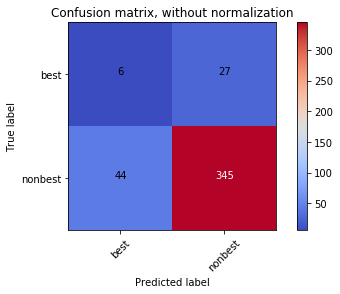

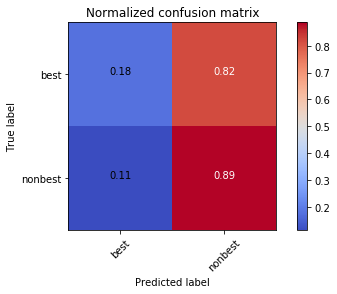

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [67]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.83


In [68]:
import collections

In [69]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
    importance   name_feature
0     0.213114     num_tokens
12    0.113913        ger_inf
3     0.072241      num_advcl
11    0.061828          adj_n
14    0.059024          n_inf
9     0.055448           poss
4     0.053656      num_sents
15    0.050320         num_vp
1     0.046752        num_acl
18    0.044826         num_np
10    0.043147        prep_ph
17    0.043049      max_depth
2     0.026284  num_acl_relcl
5     0.022505         num_cl
13    0.022310         part_n
7     0.019651        num_ctu
16    0.018534      min_depth
8     0.018196      num_coord
6     0.015201         num_tu
19    0.000000       type_ess


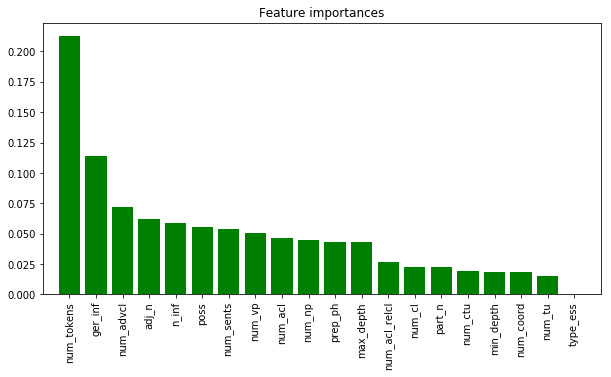

In [70]:
imp(clf1, X_df_best_non.columns)

In [71]:
res.shape

(2118, 21)

In [122]:
res = res.drop(['type_ess'], axis=1)

In [123]:
best = res[res['mark_best_nonbest'] == 'best']
nonbest = res[res['mark_best_nonbest'] == 'nonbest']

In [124]:
best.shape

(169, 20)

In [125]:
nonbest.shape

(1949, 20)

In [215]:
def count_accuracy(df):
    y = df.values[:, df.shape[1]-1]
    X_df_best_non = df.drop(['mark_best_nonbest'], axis=1)
    X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
    X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
    #skf.get_n_splits(X, y)
    for train_index, test_index in skf.split(X, y):
        #print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    parameters = {'max_depth': range(1, 101),'max_features': range(1, X_df_best_non.shape[1])}
    clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
    clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    return round(accuracy_score(y_test, y_pred), 2)

In [220]:
def count_accuracy2(df):
    y = df.values[:, df.shape[1]-1]
    X_df_best_non = df.drop(['mark_best_nonbest'], axis=1)
    X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
    X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
    #skf.get_n_splits(X, y)
    for train_index, test_index in skf.split(X, y):
        #print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    parameters = {'max_depth': range(1, 101),'max_features': range(1, X_df_best_non.shape[1])}
    clf1 = RandomForestClassifier()
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    return round(accuracy_score(y_test, y_pred), 2)

In [217]:
best_num = [16]*9
best_num.append(25)
print(sum(best_num))
nonbest_num = [195]*9
nonbest_num.append(194)
print(sum(nonbest_num))

169
1949


In [207]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(10):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy(r)
    accuracies.append(acc)

(211, 20)
(422, 20)
(633, 20)
(844, 20)
(1055, 20)
(1266, 20)
(1477, 20)
(1688, 20)
(1899, 20)
(2118, 20)


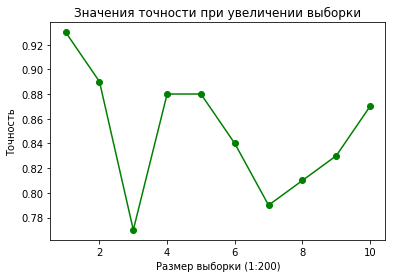

In [209]:
plt.plot([1,2,3,4,5,6,7,8,9,10], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:200)')
plt.show()

In [221]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(10):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

(211, 20)
(422, 20)
(633, 20)
(844, 20)
(1055, 20)
(1266, 20)
(1477, 20)
(1688, 20)
(1899, 20)
(2118, 20)


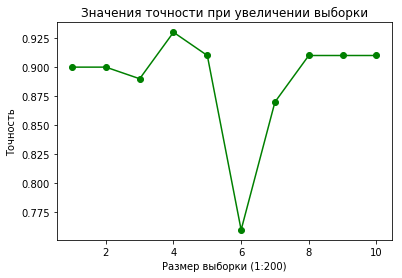

In [222]:
plt.plot([1,2,3,4,5,6,7,8,9,10], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:200)')
plt.show()

In [223]:
best_num = [8]*20
best_num.append(9)
print(sum(best_num))
nonbest_num = [93]*20
nonbest_num.append(89)
print(sum(nonbest_num))

169
1949


In [178]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(22):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy(r)
    accuracies.append(acc)

101
202
303
404
505
606
707
808
909
1010
1111
1212
1313
1414
1515
1616
1717
1818
1919
2020
2118


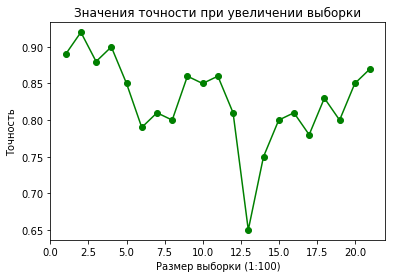

In [181]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

In [225]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(21):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

(101, 20)
(202, 20)
(303, 20)
(404, 20)
(505, 20)
(606, 20)
(707, 20)
(808, 20)
(909, 20)
(1010, 20)
(1111, 20)
(1212, 20)
(1313, 20)
(1414, 20)
(1515, 20)
(1616, 20)
(1717, 20)
(1818, 20)
(1919, 20)
(2020, 20)
(2118, 20)


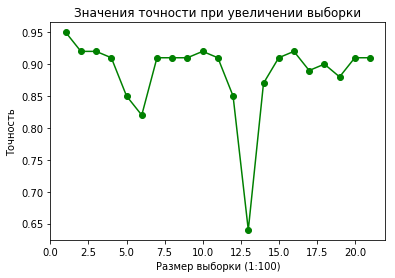

In [226]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

# Отдельно по 1 эссе

In [228]:
df1 = df1.drop(['type_ess'], axis=1)
df2 = df2.drop(['type_ess'], axis=1)

In [229]:
best = df1[df1['mark_best_nonbest'] == 'best']
nonbest = df1[df1['mark_best_nonbest'] == 'nonbest']

In [230]:
best.shape

(76, 20)

In [231]:
nonbest.shape

(980, 20)

In [240]:
best_num = [5]*14
best_num.append(6)
print(sum(best_num))
nonbest_num = [65]*14
nonbest_num.append(70)
print(sum(nonbest_num))

76
980


In [244]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(15):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy(r)
    accuracies.append(acc)

(70, 20)
(140, 20)
(210, 20)
(280, 20)
(350, 20)
(420, 20)
(490, 20)
(560, 20)
(630, 20)
(700, 20)
(770, 20)
(840, 20)
(910, 20)
(980, 20)
(1056, 20)


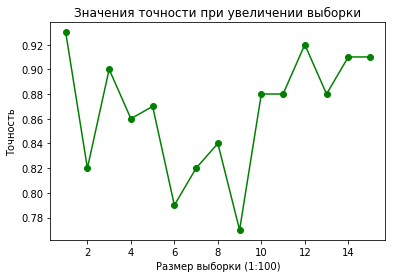

In [246]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

In [247]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(15):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

(70, 20)
(140, 20)
(210, 20)
(280, 20)
(350, 20)
(420, 20)
(490, 20)
(560, 20)
(630, 20)
(700, 20)
(770, 20)
(840, 20)
(910, 20)
(980, 20)
(1056, 20)


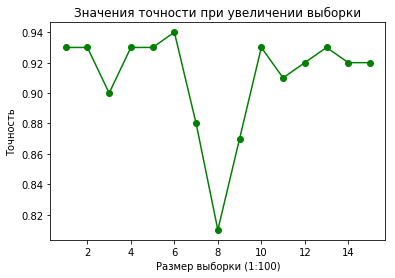

In [248]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

# Отдельно по 2 эссе

In [249]:
best = df2[df2['mark_best_nonbest'] == 'best']
nonbest = df2[df2['mark_best_nonbest'] == 'nonbest']

In [250]:
best.shape

(93, 20)

In [251]:
nonbest.shape

(969, 20)

In [262]:
best_num = [5]*17
best_num.append(8)
print(sum(best_num))
nonbest_num = [54]*17
nonbest_num.append(51)
print(sum(nonbest_num))

93
969


In [264]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(18):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy(r)
    accuracies.append(acc)

(59, 20)
(118, 20)
(177, 20)
(236, 20)
(295, 20)
(354, 20)
(413, 20)
(472, 20)
(531, 20)
(590, 20)
(649, 20)
(708, 20)
(767, 20)
(826, 20)
(885, 20)
(944, 20)
(1003, 20)
(1062, 20)


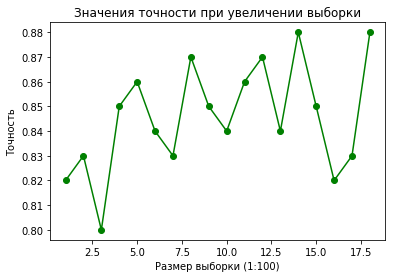

In [265]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

In [266]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(18):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

(59, 20)
(118, 20)
(177, 20)
(236, 20)
(295, 20)
(354, 20)
(413, 20)
(472, 20)
(531, 20)
(590, 20)
(649, 20)
(708, 20)
(767, 20)
(826, 20)
(885, 20)
(944, 20)
(1003, 20)
(1062, 20)


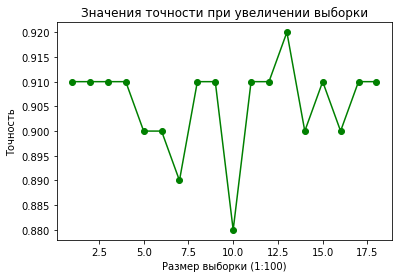

In [267]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()